# IRIS DATASET CLASSIFICATION

**Problem Statement**<br>
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.
     
**Dataset**<br>
Use the `Iris` dataset available in the `sklearn` library.


# About The Dataset

The "Iris" dataset, originally published at UCI Machine Learning Repository is often used for testing out machine learning algorithms and visualizations. Each row of the dataset represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.     
For more details regarding dataset visit : https://en.wikipedia.org/wiki/Iris_flower_data_set

<hr>

# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Importing dataset

In [2]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# df['species'] = iris.target
# print(df.head())

In [3]:
from sklearn.datasets import load_iris
iris_ds = load_iris(as_frame=True)
df = iris_ds.frame

# Dataset Information

In [4]:
#dataset description
print(colored("DESCRIPTION OF IRIS DATASET\n___________________________\n", "red"))
print(iris_ds.DESCR)

DESCRIPTION OF IRIS DATASET
___________________________

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: N

In [5]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
#basic statistical information on features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [7]:
#inspecting first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#renaming features and target
df.rename(columns={'sepal length (cm)':'sepal length', 'sepal width (cm)':'sepal width', 'petal length (cm)':'petal length',
                   'petal width (cm)':'petal width', 'target':'species'}, inplace=True)

In [9]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### NOTE:
- Iris dataset has 150 observations
- The dataset has 4 features and 1 target
- All features are numerical
- There are no missing values

<hr>

# Data Exploration

In [10]:
cols_to_plot=['sepal length', 'sepal width', 'petal length', 'petal width']

In [11]:
# features v/s species

In [12]:
# for col in cols_to_plot:
#     plt.figure(figsize=(12,4))
#     sns.scatterplot(data=df, x=col, y="species", hue="species", palette="deep")
#     plt.yticks([0, 1, 2])
#     plt.show()

### Distribution of Features

In [13]:
#creating function to plot histogram and box plot after transformation
sns.set_theme(palette='flare')
def plot_features(feature):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    
    #histogram
    sns.histplot(df[feature], kde=True, ax=axs[0])
    axs[0].set_title(f'{feature} - Histogram')
    
    #boxplot
    sns.boxplot(y=df[feature], ax=axs[1]) 
    axs[1].set_title(f'{feature} - Box Plot')
    
    plt.show()

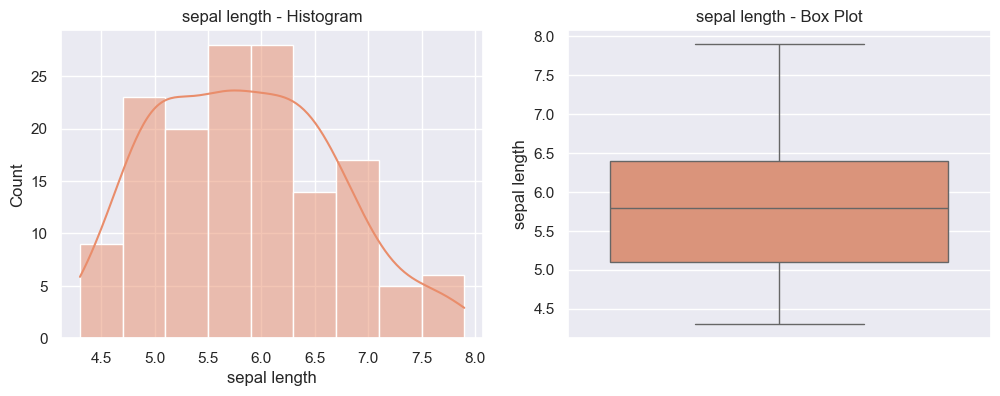

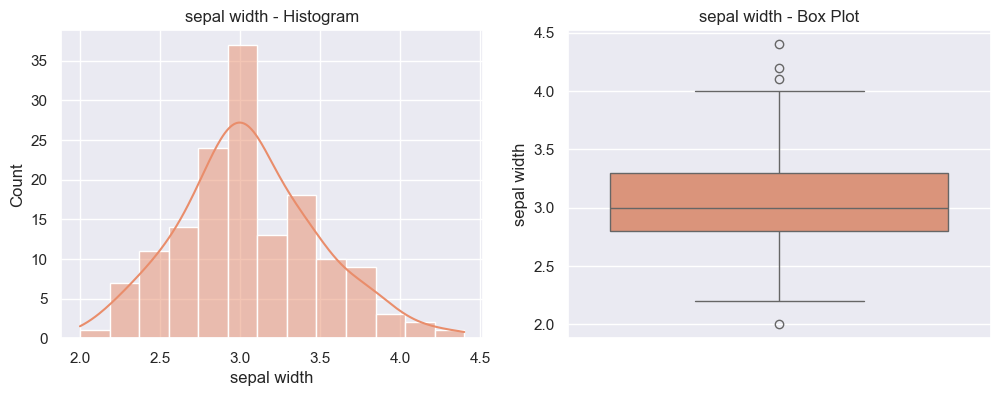

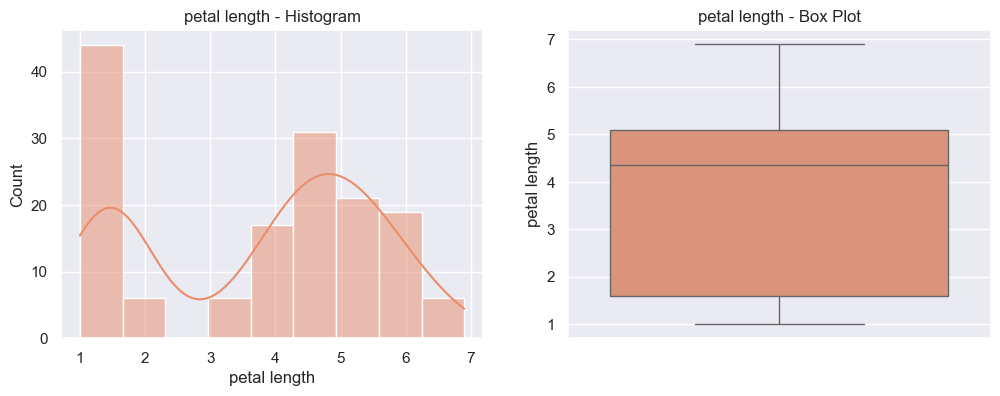

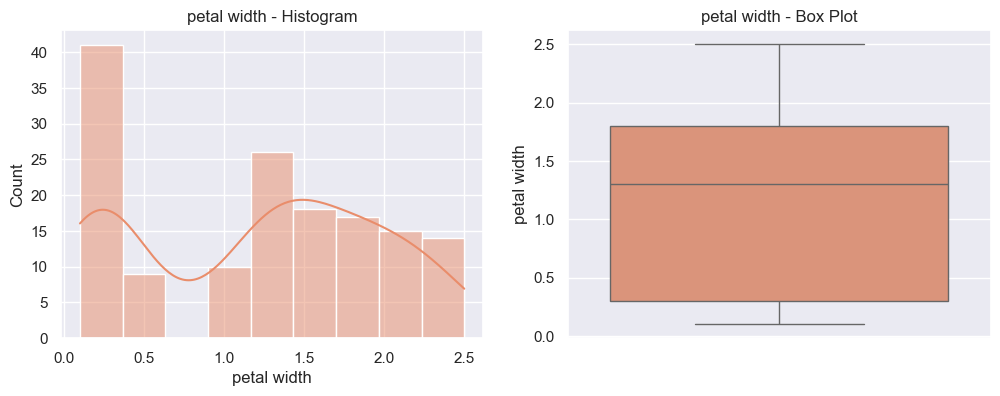

In [14]:
for feature in cols_to_plot:
    plot_features(feature)

### Correlation Analysis

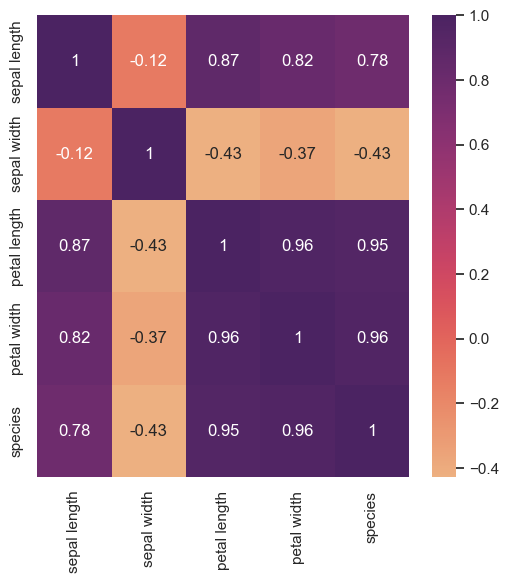

In [15]:
correlation_matrix=df.corr()
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='flare')  
plt.show()

<hr>

# Data Preprocessing

In [16]:
#droping column 'species'
df.drop(columns=['species'], axis=1, inplace=True)

In [17]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
# Scaling Features

In [19]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# x_scaled =std_scaler.fit_transform(df)

In [20]:
# df_scaled=pd.DataFrame(x_scaled, columns=df.columns)

In [21]:
# df_scaled.head()

### Data Scaling and Handling Outliers
`Scaling the dataset introduced anomalies in the clustering results, so the dataset was not scaled.`                      
`Outliers in the data were left as is without any handling or removal.`    



<hr>

# Clustering Algorithm Implementation

## 1. KMeans Clustering 

**K-Means Clustering** is an unsupervised learning algorithm, that divides the unlabeled dataset into **'K'** different clusters in such a way that each dataset belongs only one group that has similar properties. It works by iteratively updating the centroids (geometric center) of the clusters and reassigning the data points to the cluster with the closest centroid.


**K-Means Clustering** is an algorithm that works best with datasets that have few dimensions, are numeric, and contain clusters that are easily separable. Given these characteristics, K-Means can be a good choice for classifying the Iris dataset, as it involves only 4 numeric features with easily partitionable classes.

<!-- to avoid UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1. -->

In [22]:
#to avoid UserWarning on memory leak
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
#calculating WCSS scores for clusters ranging from 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

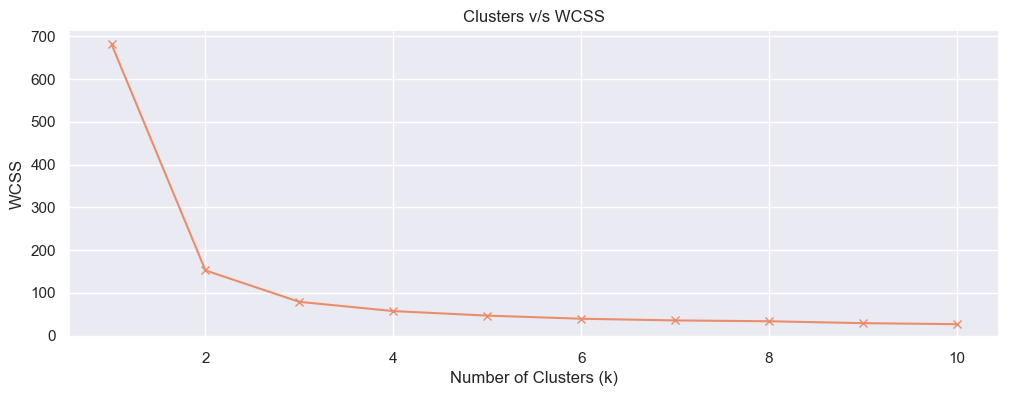

In [23]:
#plotting WCSS scores to identify optimal number of clusters
plt.figure(figsize=(12,4))
plt.plot(range(1, 11), wcss, marker='x')
plt.title('Clusters v/s WCSS')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

## Note:
**the ideal number of clusters appear to be 3 based on the elbow method**

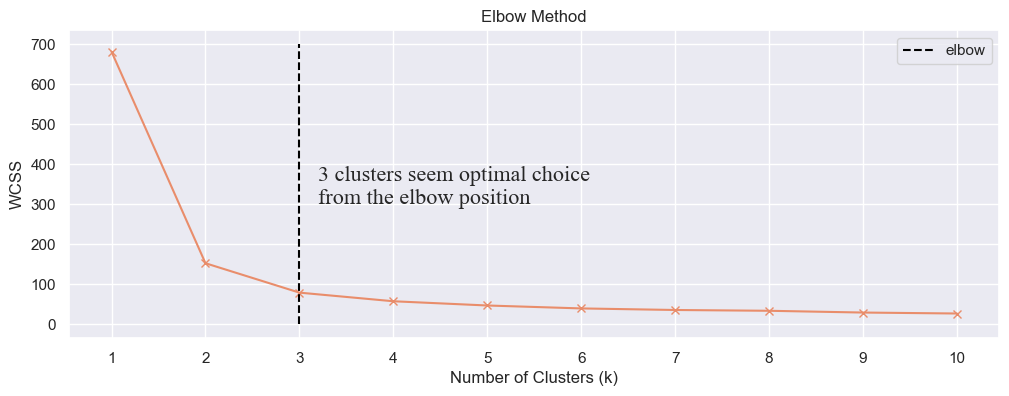

In [24]:
plt.figure(figsize=(12,4))
plt.plot(range(1, 11), wcss, marker='x')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(list(range(1,11)))
plt.vlines(x=3, linestyles='dashed', label='elbow', colors='black', ymin=0, ymax=700)
plt.text(x=3.2,y=300,s='3 clusters seem optimal choice \nfrom the elbow position',
             fontsize=16,fontdict={'family':'Times New Roman'})
plt.legend()
plt.show()

In [25]:
#applying KMeans clustering with K=3
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(df)

cluster_labels = kmeans.labels_
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


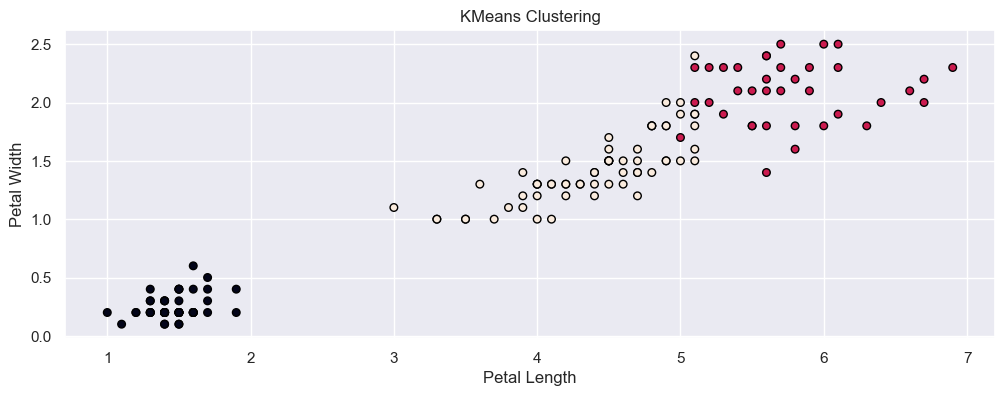

In [26]:
# Visualizing clusters
plt.figure(figsize=(12,4))
plt.scatter(df['petal length'], df['petal width'], c=cluster_labels, s=30,  edgecolor='black', label=cluster_labels)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clustering')
plt.show()

<br>

## 2. Hierarchical Clustering

**Hierarchical clustering** is an unsupervised learning algorithm that groups data into a tree of nested clusters by merging(*Agglomerative method*) or splitting(*Divisive method*) existing clusters. It can be visualized as a *dendrogram*, which shows the relationships between the clusters

**Hierarchical clustering** is suitable for the Iris dataset because it can handle complex relationships between the features and identify clusters at different levels.

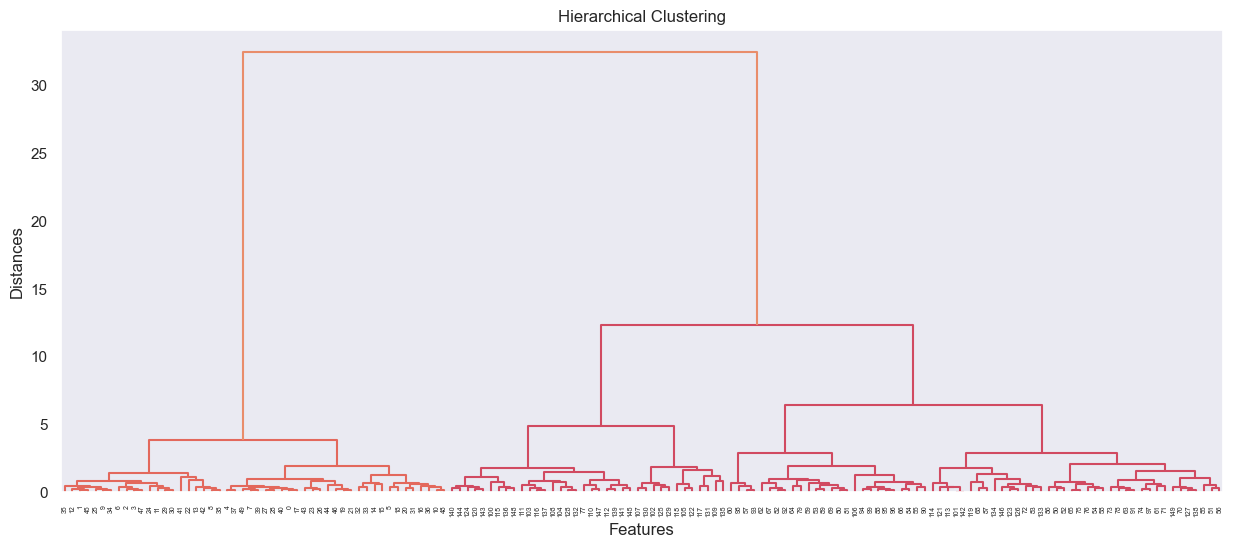

In [27]:
import scipy.cluster.hierarchy as sch

#plotting dendrogram
plt.figure(figsize=(15,6))
plt.title('Hierarchical Clustering')
plt.xlabel('Features')
plt.ylabel('Distances')
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.show()

In [28]:
#calculating silhoutte scores for range of clusters
from sklearn.metrics import silhouette_score

linkage_matrix = sch.linkage(df, method='ward')
silhouettes={}
for n in range (1,11):
    #fcluster seperates data into the given number of clusters
    clusters_n = sch.fcluster(linkage_matrix, t=n, criterion='distance')
    silhouette_n = silhouette_score(df, clusters_n)
    silhouettes[n]=silhouette_n

In [29]:
#calculated silhoutte scores
dict(silhouettes)

{1: 0.2821732828528967,
 2: 0.3304886352874665,
 3: 0.3592376192603089,
 4: 0.4843825892790602,
 5: 0.48896708575546977,
 6: 0.48896708575546977,
 7: 0.5543236611296425,
 8: 0.5543236611296425,
 9: 0.5543236611296425,
 10: 0.5543236611296425}

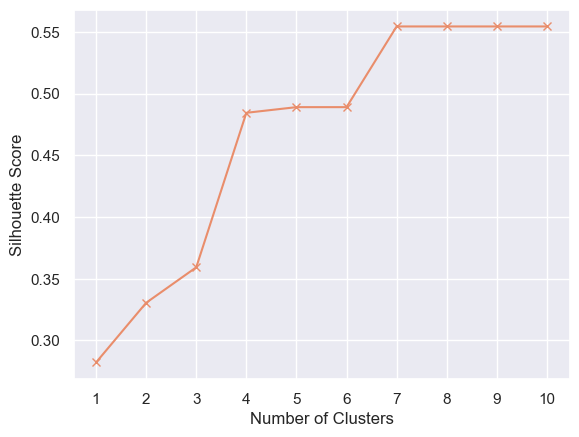

In [30]:
#clusters v/s silhoutte score
plt.plot(silhouettes.keys(), silhouettes.values(), marker='x')
plt.xticks(list(range(1,11)))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Note:
**the ideal number of clusters appear to be more than 3 (*4 to 5* from the dendrogram and 7 from the silhouttle analysis). However based on the domain knowledge Iris flowers are classified into 3 and hence we finalize the number of clusters as 3**

In [31]:
#applying agglomerative hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric='euclidean', linkage = 'ward')
target = hc.fit_predict(df)

In [32]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

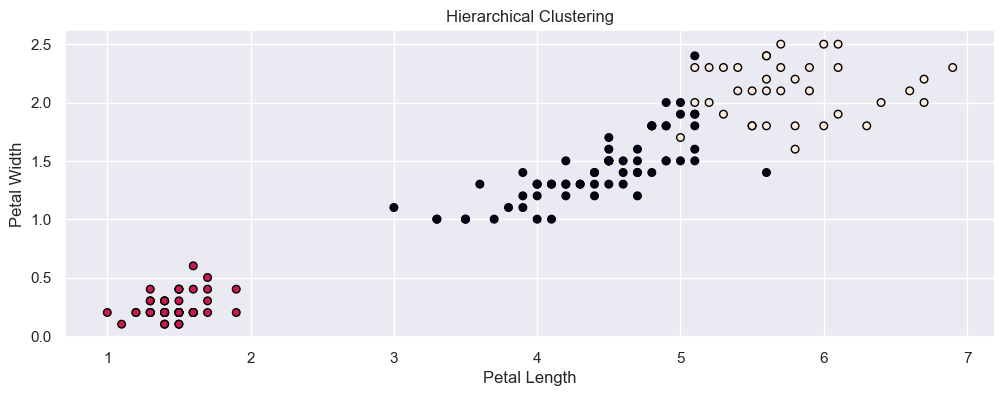

In [33]:
#Visualizing clusters
plt.figure(figsize=(12,4))
plt.scatter(df['petal length'], df['petal width'], c=target, s=30,  edgecolor='black', label=target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Hierarchical Clustering')
plt.show()

<hr>

# Insights:

### KMeans Clustering 

- The Elbow method applied on the KMeans clustering algorithm suggests that the optimal number of clusters is 3.
- This aligns with the known classification of the Iris dataset into three species: Iris-Setosa, Iris-Versicolour, and Iris-Virginica.

### Agglomerative Hierarchical Clustering

- Based on silhouette analysis and the dendrogram, the possible number of clusters ranges between 3 and 7.
- The silhouette score indicates that 7 clusters may be ideal, which suggests the existence of subgroups within the data.

### Dataset Description

- According to the dataset, the Iris flowers are classified into three species:    
        Iris-Setosa    
        Iris-Versicolour    
        Iris-Virginica   


<br>

### Comparing Clusters

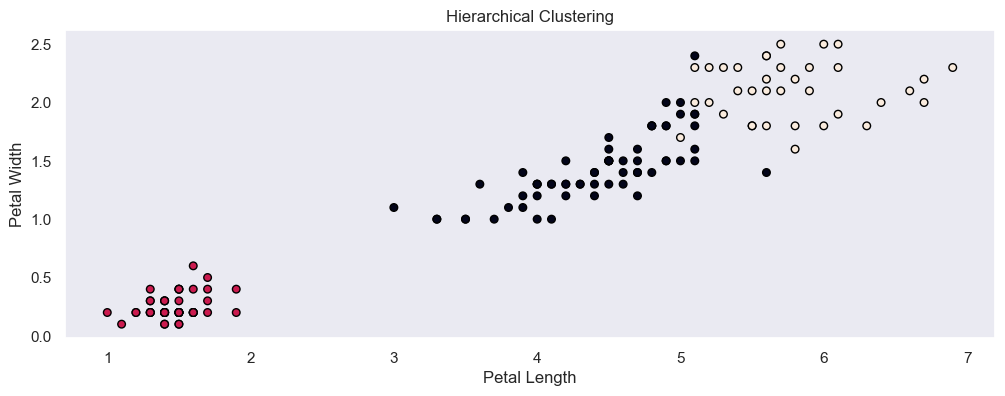

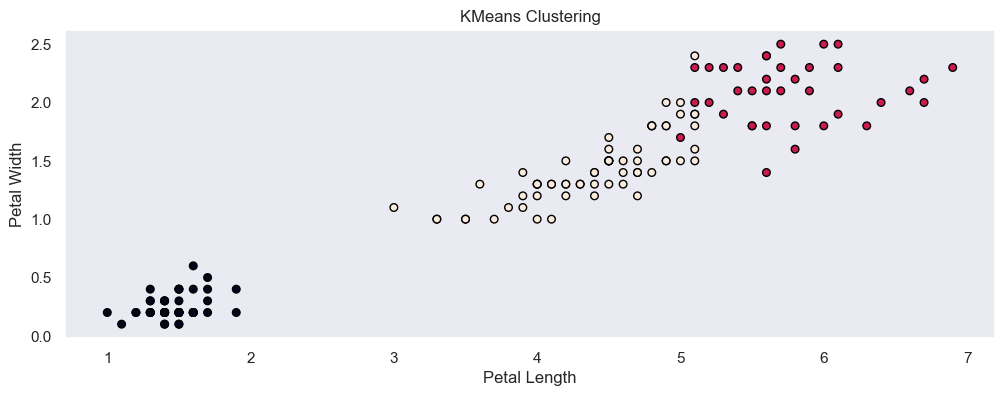

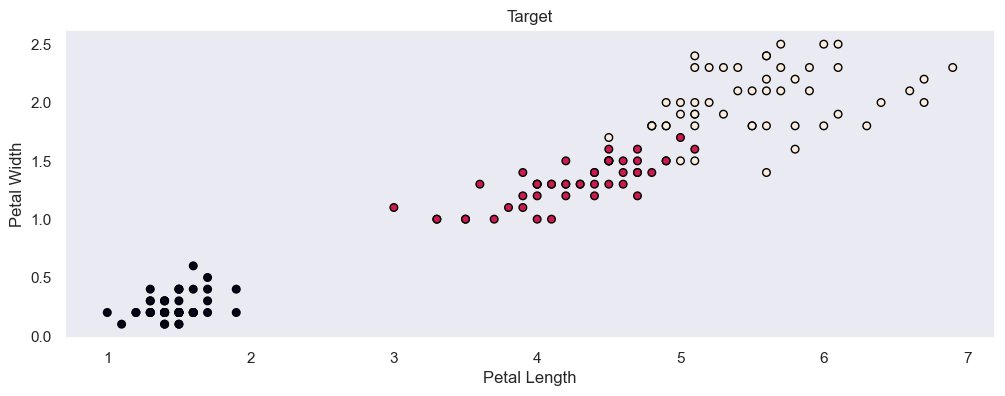

In [34]:
#Hierarchical Clustering
plt.figure(figsize=(12,4))
plt.scatter(df['petal length'], df['petal width'], c=target, s=30,  edgecolor='black', label=target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Hierarchical Clustering')
plt.grid(False)
plt.show()

# KMeans Clustering
plt.figure(figsize=(12,4))
plt.scatter(df['petal length'], df['petal width'], c=cluster_labels, s=30,  edgecolor='black', label=cluster_labels)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KMeans Clustering')
plt.grid(False)
plt.show()

#original classes from dataset
og_df=load_iris(as_frame=True).frame
plt.figure(figsize=(12,4))
plt.scatter(og_df['petal length (cm)'], og_df['petal width (cm)'], c=og_df['target'], s=30,  edgecolor='black', label=cluster_labels)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Target')
plt.grid(False)
plt.show()